In [28]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [29]:
# Load in the water analysis Dataset
path="/content/waterQuality1.csv"
data = pd.read_csv(path)


In [49]:
data.head(10)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1.0
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1.0
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0.0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1.0
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1.0
5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1.0
6,2.36,5.60,0.01,1.35,0.004,1.28,0.62,1.88,0.33,0.13,...,0.021,18.60,1.78,0.007,45.34,2.84,0.10,0.24,0.08,0.0
7,3.93,19.87,0.04,0.66,0.001,6.22,0.10,1.86,0.86,0.16,...,0.197,13.65,1.81,0.001,53.35,7.24,0.08,0.08,0.07,0.0
8,0.60,24.58,0.01,0.71,0.005,3.14,0.77,1.45,0.98,0.35,...,0.167,14.66,1.84,0.004,23.43,4.99,0.08,0.25,0.08,1.0
9,0.22,16.76,0.02,1.37,0.007,6.40,0.49,0.82,1.24,0.83,...,0.109,4.79,1.46,0.010,30.42,0.08,0.03,0.31,0.01,1.0


In [31]:
data.shape


(7999, 21)

In [32]:
data.isnull().sum()


aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [33]:

# Display basic information about the dataset
print(data.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [34]:
# Replace non-numeric values with NaN
data.replace('#NUM!', pd.NA, inplace=True)

# Convert the entire DataFrame to numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values (you can choose a different strategy if needed)
data.dropna(inplace=True)

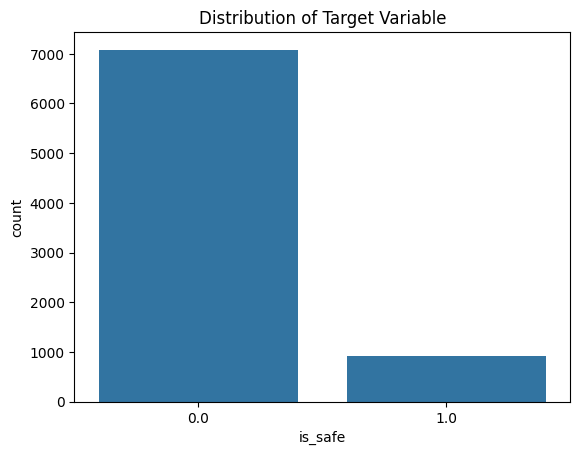

In [35]:
# Visualize the distribution of the target variable 'is_safe'
sns.countplot(x='is_safe', data=data)
plt.title('Distribution of Target Variable')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data.drop('is_safe', axis=1)  # Features
y = data['is_safe']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("Shape of Training Set (X_train):", X_train.shape)
print("Shape of Testing Set (X_test):", X_test.shape)
print("Shape of Training Set (y_train):", y_train.shape)
print("Shape of Testing Set (y_test):", y_test.shape)


Shape of Training Set (X_train): (6396, 20)
Shape of Testing Set (X_test): (1600, 20)
Shape of Training Set (y_train): (6396,)
Shape of Testing Set (y_test): (1600,)


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.960625

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1400
         1.0       0.97      0.70      0.82       200

    accuracy                           0.96      1600
   macro avg       0.97      0.85      0.90      1600
weighted avg       0.96      0.96      0.96      1600


Confusion Matrix:
[[1396    4]
 [  59  141]]


<ipython-input-39-c4af779edf7d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


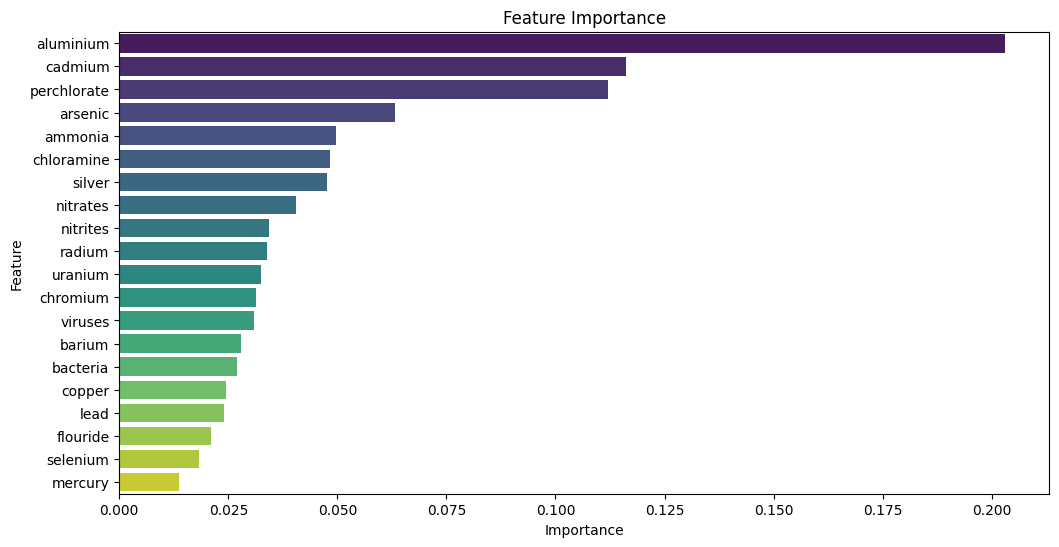

In [39]:
# Get feature importances from the random forest model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()


In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model on the testing data
y_pred_nn = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Neural Network Accuracy:", accuracy_nn)

# Display classification report and confusion matrix
print("\nNeural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))

print("\nNeural Network Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))


Epoch 1/10
200/200 [==============================] - 3s 5ms/step - loss: 0.4246 - accuracy: 0.8254 - val_loss: 0.2917 - val_accuracy: 0.8769
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2907 - accuracy: 0.8935 - val_loss: 0.2599 - val_accuracy: 0.8925
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2619 - accuracy: 0.9001 - val_loss: 0.2436 - val_accuracy: 0.9050
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2429 - accuracy: 0.9059 - val_loss: 0.2362 - val_accuracy: 0.9050
Epoch 5/10
200/200 [==============================] - 1s 2ms/step - loss: 0.2404 - accuracy: 0.9092 - val_loss: 0.2252 - val_accuracy: 0.9056
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2315 - accuracy: 0.9135 - val_loss: 0.2179 - val_accuracy: 0.9087
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2193 - accuracy: 0.9176 - val_loss: 0.2138 - val_accuracy: 0.9106
Epoch 

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Support Vector Machine Classifier
svm_classifier = SVC(kernel='rbf', random_state=42)  # 'rbf' stands for Radial Basis Function kernel

# Train the model on the training data
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Display classification report and confusion matrix
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nSVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.936875

SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      1400
         1.0       0.93      0.54      0.68       200

    accuracy                           0.94      1600
   macro avg       0.93      0.76      0.82      1600
weighted avg       0.94      0.94      0.93      1600


SVM Confusion Matrix:
[[1392    8]
 [  93  107]]
